In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt
customer_df = pd.read_csv('/content/customers.csv')
customer_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [6]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [5]:
customer_df.dtypes

,0
ID,int64
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object


In [7]:
customer_df.shape


customer_df.isnull().sum()


customer_df_cleaned = customer_df.dropna(axis=0)


customer_df_cleaned.isnull().sum()


customer_df_cleaned.shape


customer_df_cleaned.dtypes


customer_df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]


In [9]:
enc = OrdinalEncoder(categories=categories_list)


customers_1 = customer_df_cleaned.copy()


customers_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])


customers_1.dtypes


le = LabelEncoder()


customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])


customers_1.dtypes


customers_1 = customers_1.drop('ID',axis=1)
customers_1 = customers_1.drop('Var_1',axis=1)


customers_1.dtypes

,0
Gender,float64
Ever_Married,float64
Age,int64
Graduated,float64
Profession,float64
Work_Experience,float64
Spending_Score,float64
Family_Size,float64
Segmentation,int64


In [10]:
corr = customers_1.corr()

<ipython-input-11-060db5f27bab>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers_1['Age'])


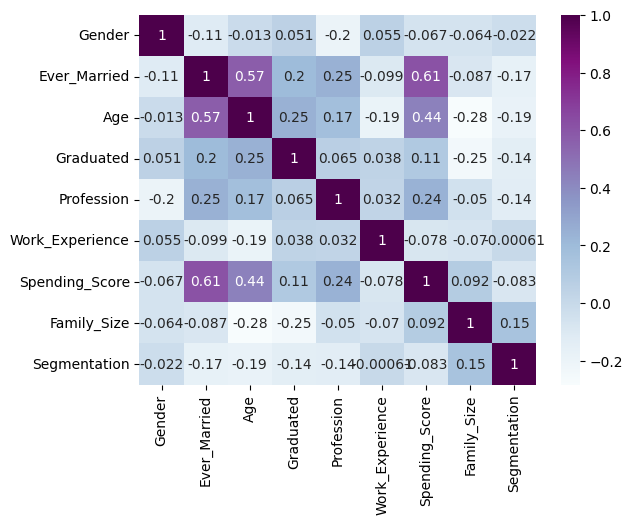

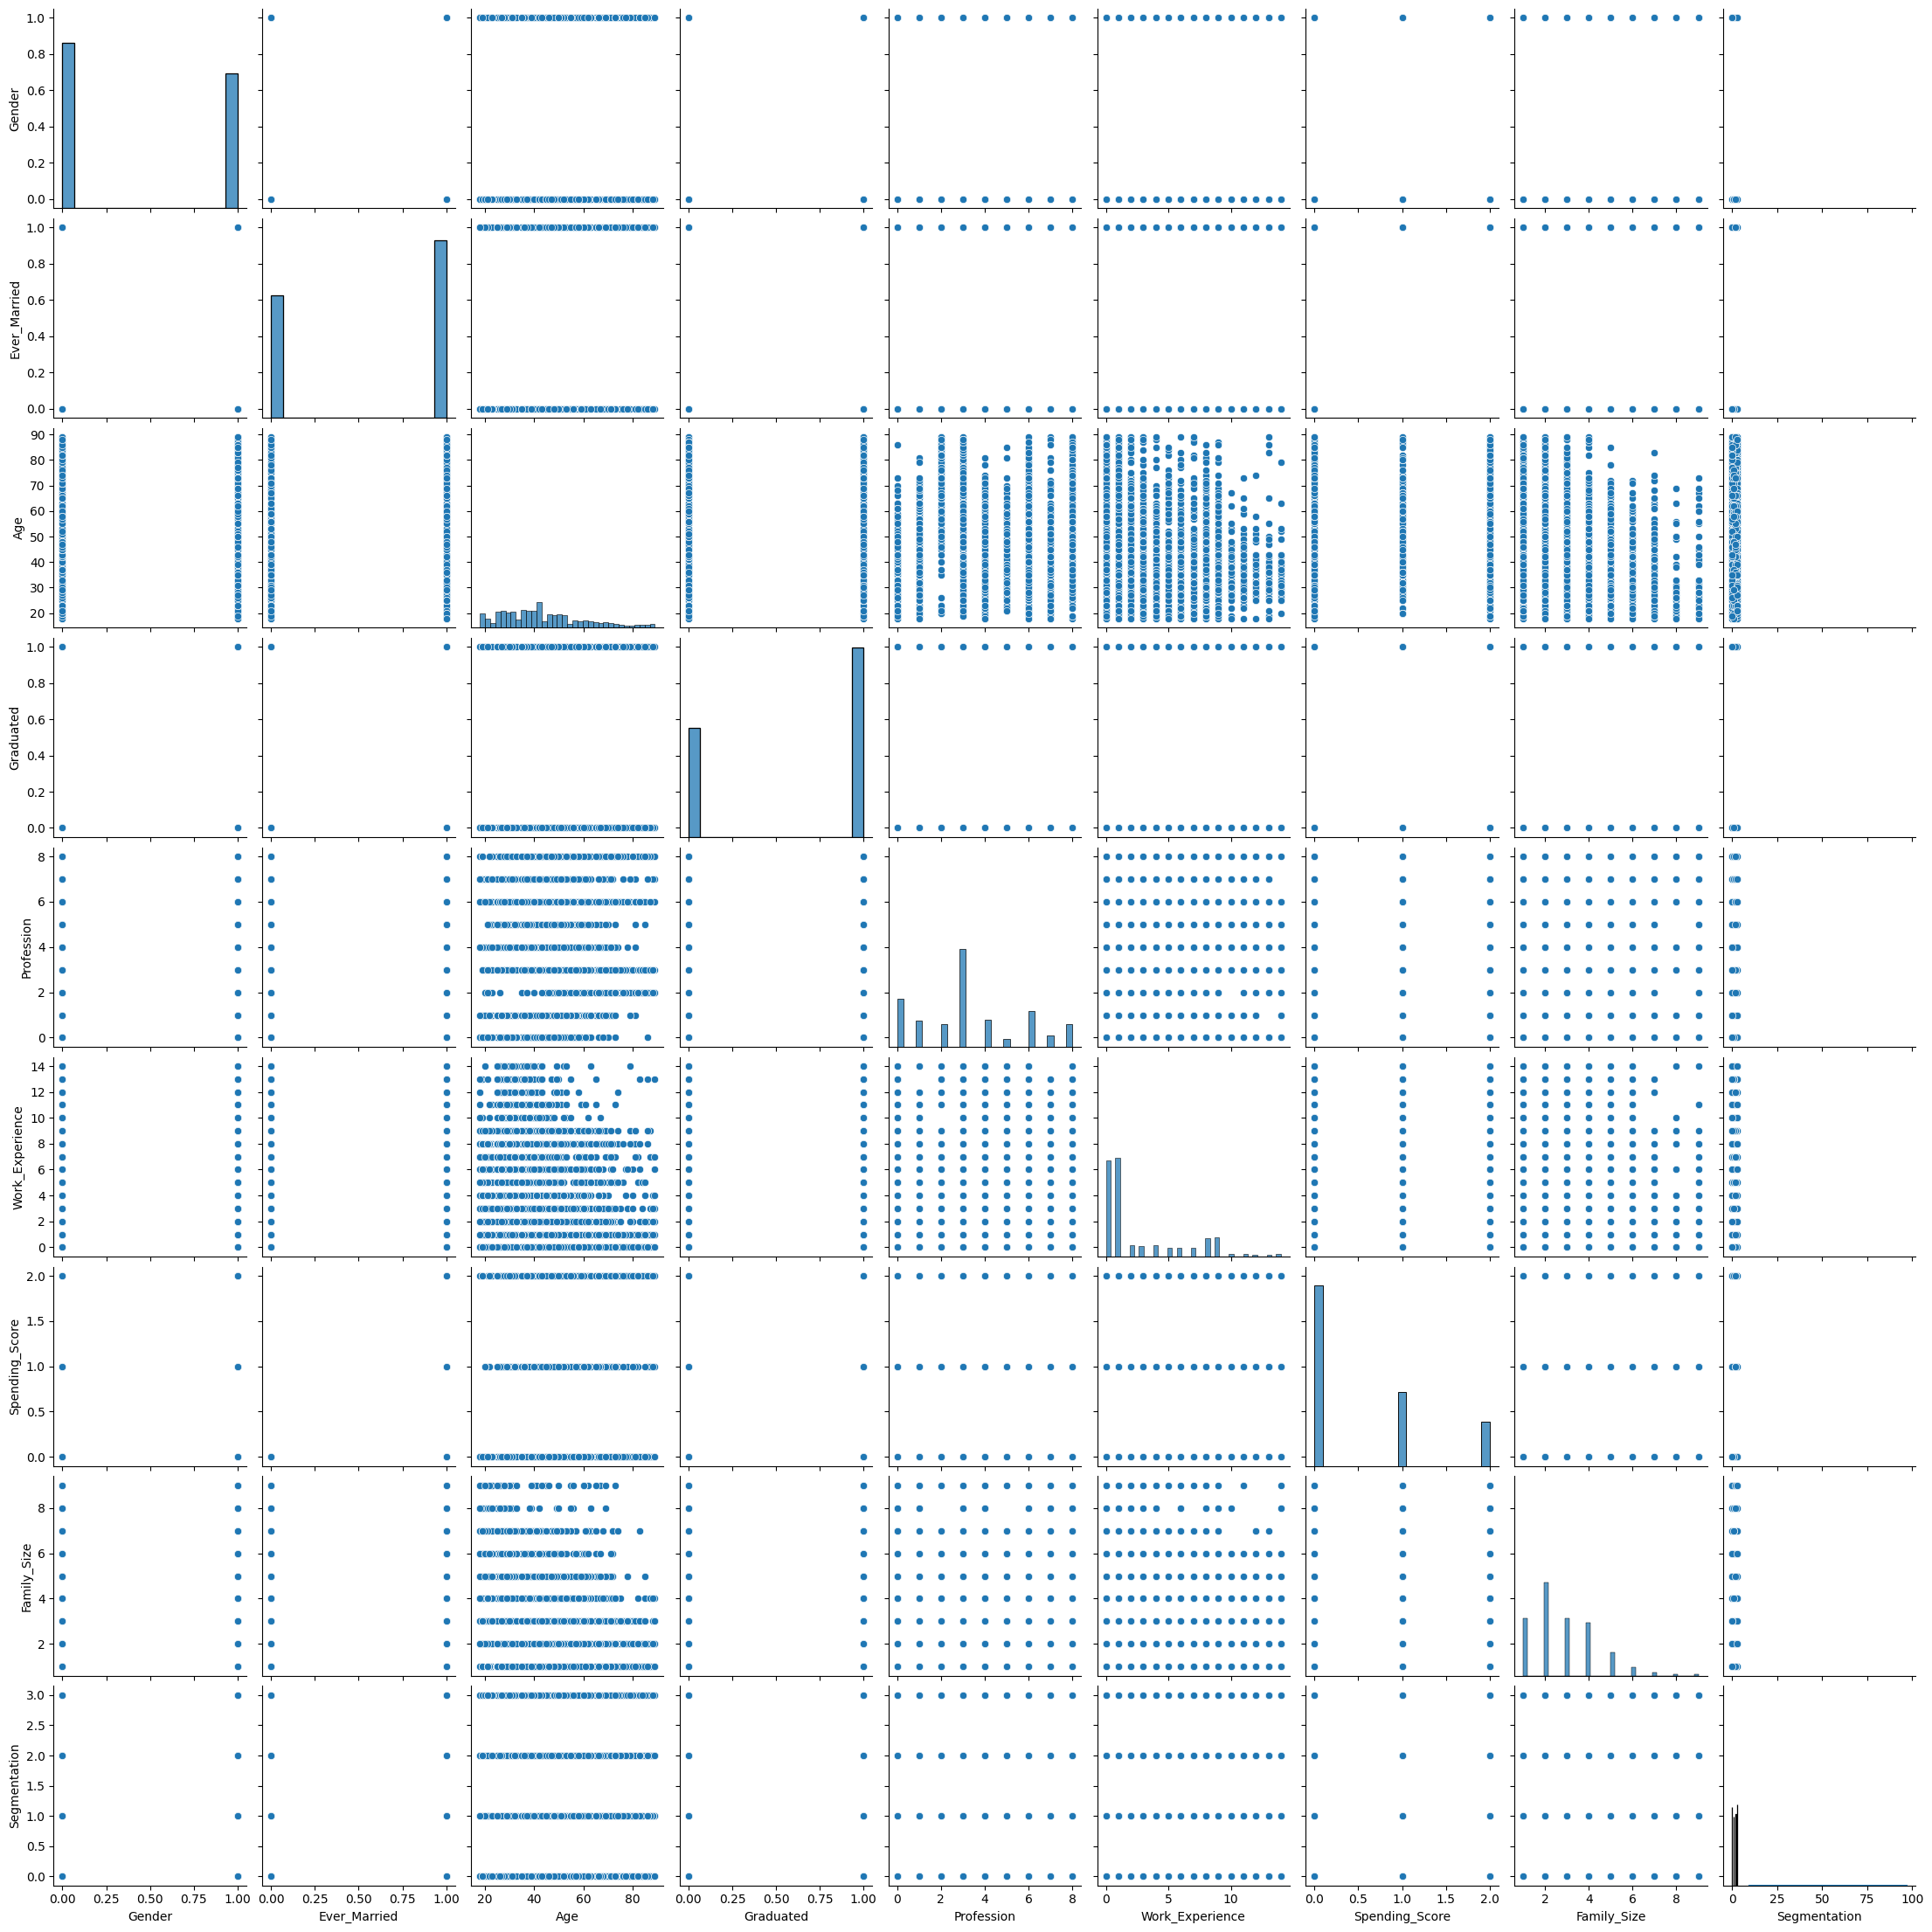

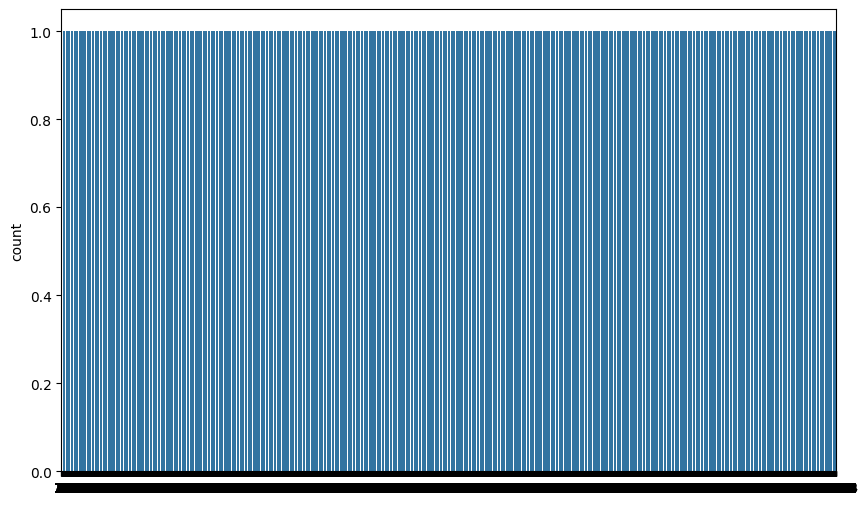

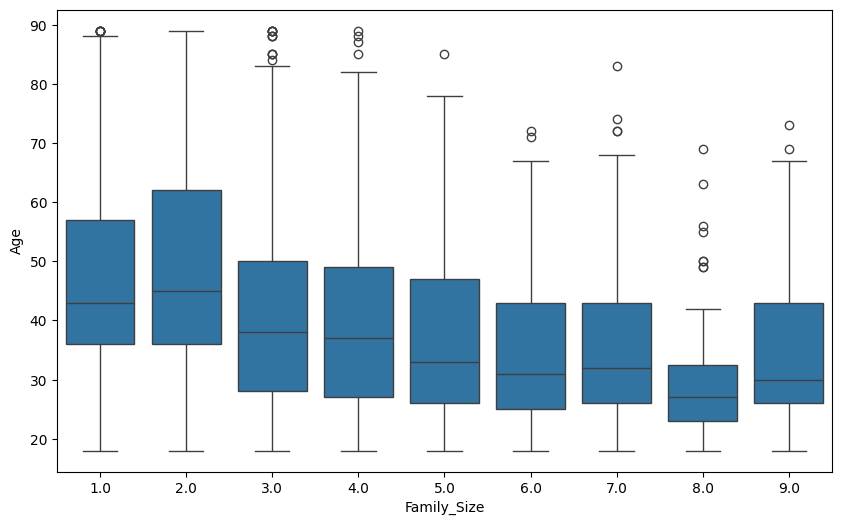

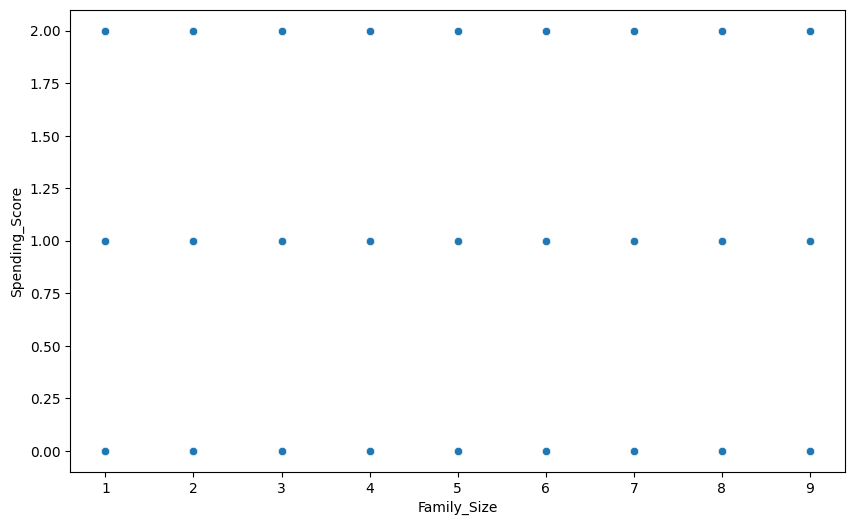

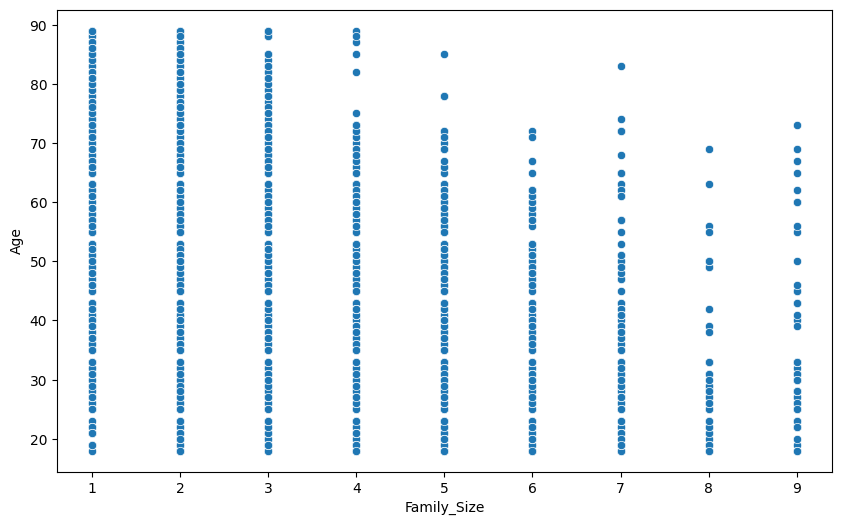

In [11]:
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="BuPu",
        annot= True)


sns.pairplot(customers_1)


sns.distplot(customers_1['Age'])


plt.figure(figsize=(10,6))
sns.countplot(customers_1['Family_Size'])


plt.figure(figsize=(10,6))
sns.boxplot(x='Family_Size',y='Age',data=customers_1)


plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Spending_Score',data=customers_1)


plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=customers_1)


customers_1.describe()


customers_1['Segmentation'].unique()


X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values


y1 = customers_1[['Segmentation']].values


one_hot_enc = OneHotEncoder()


one_hot_enc.fit(y1)


y1.shape


y = one_hot_enc.transform(y1).toarray()


y.shape


y1[0]


y[0]


X.shape


X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)


X_train[0]


X_train.shape


scaler_age = MinMaxScaler()


scaler_age.fit(X_train[:,2].reshape(-1,1))


X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [12]:

X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

ai_brain = Sequential([
  Dense(4,input_shape=(8,)),
  Dense(8,activation='relu'),
  Dense(8,activation='relu'),
  Dense(4,activation='softmax'),
])

ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=2)
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,batch_size=250,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/2000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2626 - loss: 1.7230 - val_accuracy: 0.2649 - val_loss: 1.4995
Epoch 2/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2650 - loss: 1.4759 - val_accuracy: 0.2937 - val_loss: 1.3871
Epoch 3/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2969 - loss: 1.3843 - val_accuracy: 0.3511 - val_loss: 1.3672
Epoch 4/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3490 - loss: 1.3674 - val_accuracy: 0.3638 - val_loss: 1.3598
Epoch 5/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3542 - loss: 1.3621 - val_accuracy: 0.3683 - val_loss: 1.3526
Epoch 6/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3703 - loss: 1.3484 - val_accuracy: 0.3734 - val_loss: 1.3445
Epoch 7/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3738 - loss: 1.3411 - val_accuracy: 0.3714 - val_loss: 1.3365
Epoch 8/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3716 - loss: 1.3340 - val_accuracy: 0.3738 - val_l

In [13]:
metrics = pd.DataFrame(ai_brain.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.266926,1.650131,0.264857,1.499529
1,0.272004,1.439327,0.293714,1.387128
2,0.317536,1.377743,0.351082,1.367169
3,0.357481,1.364800,0.363793,1.359820
4,0.359343,1.357306,0.368258,1.352632


<Axes: >

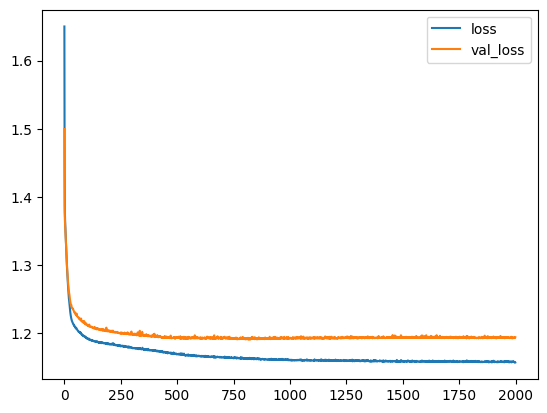

In [14]:
metrics[['loss','val_loss']].plot()


In [15]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)


x_test_predictions.shape


y_test_truevalue = np.argmax(y_test,axis=1)


y_test_truevalue.shape

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(2911,)

In [16]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))


[[360 123  89 185]
 [225 167 192 102]
 [120 126 339 101]
 [188  52  44 498]]


In [17]:
print(classification_report(y_test_truevalue,x_test_predictions))


              precision    recall  f1-score   support

           0       0.40      0.48      0.44       757
           1       0.36      0.24      0.29       686
           2       0.51      0.49      0.50       686
           3       0.56      0.64      0.60       782

    accuracy                           0.47      2911
   macro avg       0.46      0.46      0.46      2911
weighted avg       0.46      0.47      0.46      2911



In [18]:
ai_brain.save('customer_classification_model.h5')
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le], fh)

ai_brain = load_model('customer_classification_model.h5')



with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)



x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)


print(x_single_prediction)


print(le.inverse_transform(x_single_prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[2]
['C']
